# CS381 - Image Processing - Slip Extractor Project

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

E_SLIP_DATA_CSV = 'eslip_dataset.csv'
E_SLIP_CLASSIFICATION_CSV = 'results_csv/eslip_classification.csv'
E_SLIP_OCR_CSV = 'results_csv/eslip_ocr.csv'
E_SLIP_RESULT_CSV = 'results_csv/eslip_result.csv'

folder = 'dataset'
banks = os.listdir(folder)
slip_types = os.listdir(os.path.join(folder, banks[0]))

df = pd.DataFrame(columns=['bank', 'slip_type','image_path'])

i = 0
for bank in banks:
    for slip_type in slip_types:
        imgs = os.listdir(os.path.join(folder, bank, slip_type))
        for img in imgs:
                df = pd.concat([df, pd.DataFrame({'bank': bank, 'slip_type': slip_type, 'image_path': os.path.join(folder, bank, slip_type, img)}, index=[0])], ignore_index=True)

# select e-slip
df = df[df['slip_type'] == 'e-slip']
df.to_csv(E_SLIP_DATA_CSV, index=False)
# count each bank
print(df['bank'].value_counts())

df = pd.read_csv(E_SLIP_DATA_CSV)
df

test_kbank = ('dataset/kbank/e-slip/5E45E707-D23B-4E67-AA81-AF99CAF61B94.jpeg', 'bank_logos/kbank/kbank.png')
test_scb = ('dataset/scb/e-slip/IMG_4822.JPG', 'bank_logos/scb/scb_3.jpg')
test_bangkok = ('dataset/bangkok/e-slip/IMG_4463.JPG', 'bank_logos/bangkok/bangkok.JPG')
test_krungthai = ('dataset/krungthai/e-slip/IMG_4838.JPG', 'bank_logos/krungthai/krungthai_1.png')

test_set = [test_kbank, test_scb, test_bangkok, test_krungthai]

bank
kbank        58
scb          41
krungthai    18
bangkok      12
Name: count, dtype: int64


## Data Bank Annotaion

bangkok.JPG
kbank.png
krungthai_1.png
scb_3.jpg


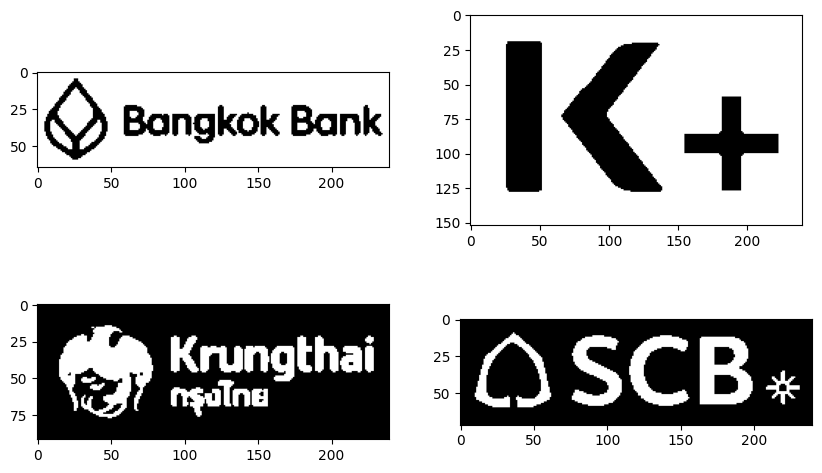

In [23]:
# print all bank logo
from function.e_slip.preprocess import preprocess_bank_slip_for_template_matching, preprocess_bank_slip, cut_image

banks = os.listdir('bank_logos')
banks = [bank for bank in banks if os.path.isdir(f'bank_logos/{bank}')]
templates = []
for bank in banks:
    bank_logos = os.listdir(f'bank_logos/{bank}')
    for bank_logo in bank_logos:
        print(bank_logo)
        img = cv2.imread(f'bank_logos/{bank}/{bank_logo}', cv2.IMREAD_GRAYSCALE)
        img_color = cv2.imread(f'bank_logos/{bank}/{bank_logo}')
        img, template = preprocess_bank_slip_for_template_matching(img, img)
        templates.append(template)

# show 4 templates in one figure
plt.figure(figsize=(10, 6))
for i, template in enumerate(templates):
    plt.subplot(2, 2, i + 1)
    plt.imshow(template, cmap='gray')

plt.show()

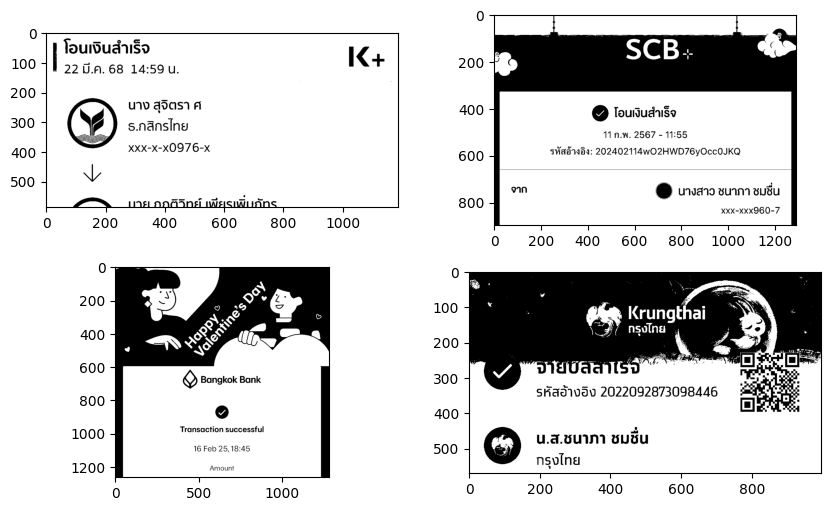

In [24]:
# preprocess test 
plt.figure(figsize=(10, 6))
for i, test in enumerate(test_set):
    img = cv2.imread(test[0], cv2.IMREAD_GRAYSCALE)
    img = cut_image(img)
    img = cut_image(img)
    img = preprocess_bank_slip(img)
    plt.subplot(2, 2, i + 1)
    plt.imshow(img, cmap='gray')
    
plt.show()

Test: dataset/kbank/e-slip/5E45E707-D23B-4E67-AA81-AF99CAF61B94.jpeg
Best scale: 0.5
Best max value: 0.899043619632721


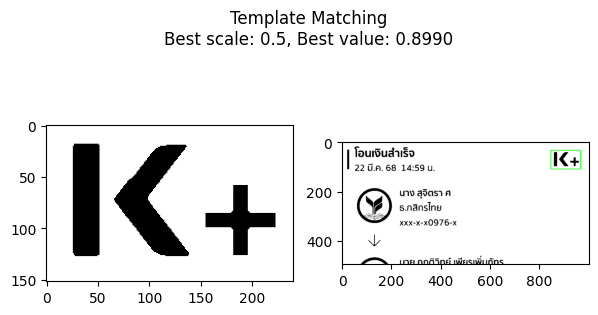

Test: dataset/scb/e-slip/IMG_4822.JPG
Best scale: 1.4000000000000004
Best max value: 0.7636062502861023


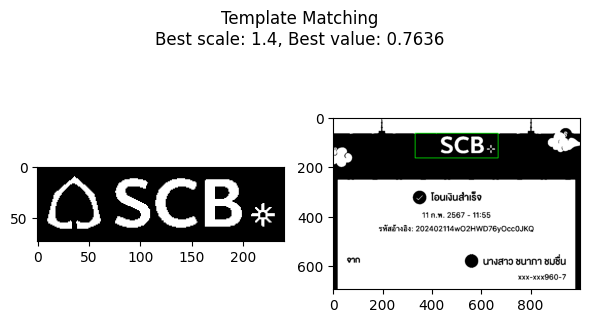

Test: dataset/bangkok/e-slip/IMG_4463.JPG
Best scale: 1.6000000000000005
Best max value: 0.8918205499649048


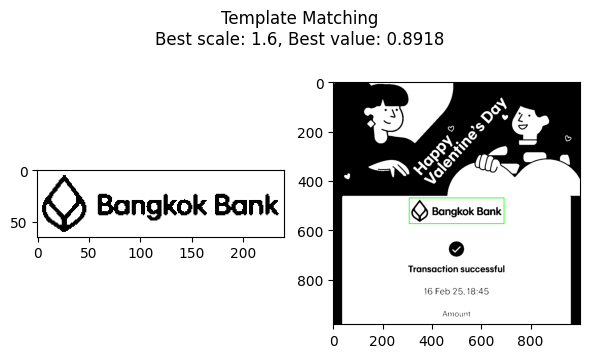

Test: dataset/krungthai/e-slip/IMG_4838.JPG
Best scale: 1.6000000000000005
Best max value: 0.757697343826294


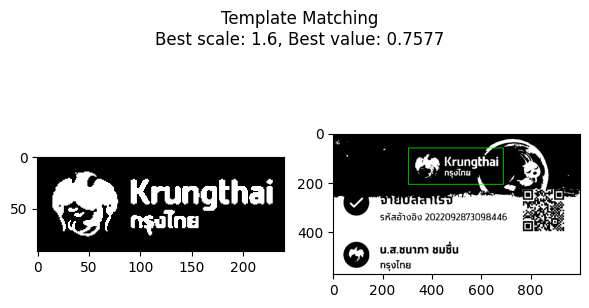

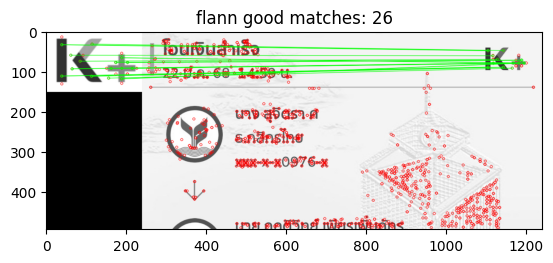

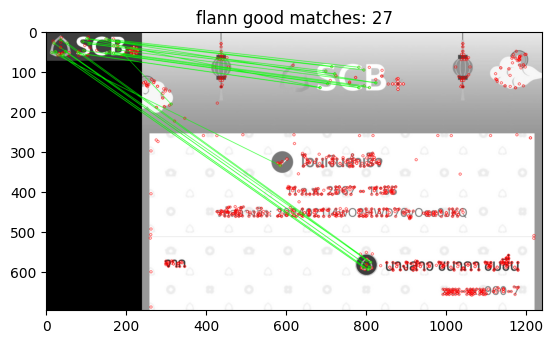

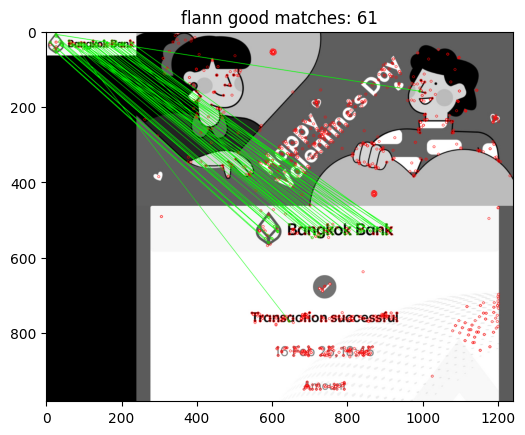

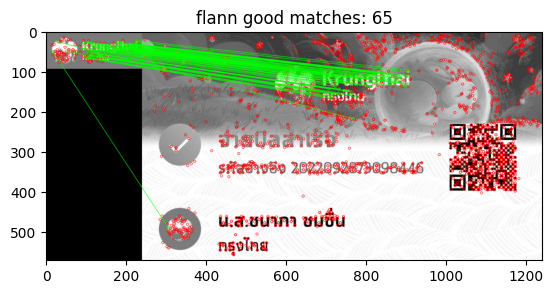

In [25]:
import cv2
import numpy as np
from function.e_slip.preprocess import preprocess_bank_slip, preprocess_bank_slip_for_template_matching, resize_image, cut_image
from function.e_slip.bank_annotation import multi_scale_template_matching, flann_matching

df = pd.read_csv(E_SLIP_DATA_CSV)

for test in test_set:
    img1 = cv2.imread(test[0], cv2.IMREAD_GRAYSCALE)
    obj1 = cv2.imread(test[1], cv2.IMREAD_GRAYSCALE)

    # 0.3 - 2.0
    scales = np.arange(0.3, 2.0, 0.1)

    img1, obj1 = preprocess_bank_slip_for_template_matching(img1, obj1)

    print(f'Test: {test[0]}')
    best_scale, best_max_val, best_max_loc, box_image = multi_scale_template_matching(img1, obj1, scales)
    print(f'Best scale: {best_scale}')
    print(f'Best max value: {best_max_val}')

    plt.figure(figsize=(7, 4))
    plt.suptitle(f'Template Matching\nBest scale: {float(best_scale):.1f}, Best value: {float(best_max_val):.4f}')
    plt.subplot(1, 2, 1)
    plt.imshow(obj1, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(box_image, cmap='gray')
    plt.show()

for test in test_set:
    img1 = cv2.imread(test[0], cv2.IMREAD_GRAYSCALE)
    obj1 = cv2.imread(test[1], cv2.IMREAD_GRAYSCALE)

    # resize object width
    obj1 = resize_image(obj1, 240)

    # resize image width
    img1 = resize_image(img1, 1000)

    # cut half of image
    img1 = cut_image(img1)
    img1 = cut_image(img1)
    
    result,good_matches = flann_matching(img1, obj1)
    # plt.figure(figsize=(15, 20))
    plt.title(f'flann good matches: {good_matches}')
    plt.imshow(result)
    plt.show()

template: bangkok.JPG
    - Template Matching Method
        Best scale: 0.2
        Best max value: 0.4843
    - Flann Matching Method
        flann good match: 4
template: kbank.png
    - Template Matching Method
        Best scale: 0.2
        Best max value: 0.4997
    - Flann Matching Method
        flann good match: 0
template: krungthai_1.png
    - Template Matching Method
        Best scale: 1.6
        Best max value: 0.7613
template: bangkok.JPG
    - Template Matching Method
        Best scale: 0.2
        Best max value: 0.4843
    - Flann Matching Method
        flann good match: 3
template: kbank.png
    - Template Matching Method
        Best scale: 0.2
        Best max value: 0.4997
    - Flann Matching Method
        flann good match: 0
template: krungthai_1.png
    - Template Matching Method
        Best scale: 1.6
        Best max value: 0.7613


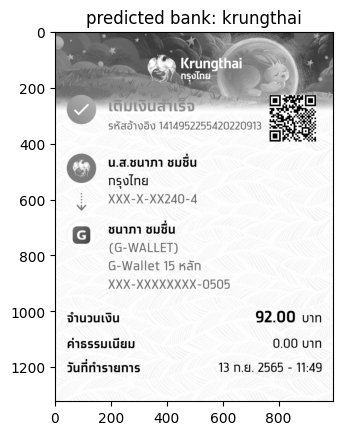

In [27]:
from function.e_slip.bank_annotation import annotation_bank

df = pd.read_csv(E_SLIP_DATA_CSV)

test_img = df['image_path'][80]
test_img = cv2.imread(test_img, cv2.IMREAD_GRAYSCALE)

annotation_bank(test_img, 'bank_logos')
plt.title(f'predicted bank: {annotation_bank(test_img, "bank_logos")}')
plt.imshow(test_img, cmap='gray')
plt.show()

### Classification Test

In [36]:
def annotation_bank_df(df, template_path):
    if isinstance(df, str):
        df = pd.read_csv(df)
    elif isinstance(df, np.ndarray):
        df = df
    elif isinstance(df, pd.DataFrame):
        df = df
    else:
        print(f"Error: Invalid dataframe path or type: {type(df)}")
        return None

    for index, row in df.iterrows():
        print(f'image: {row["image_path"]}')
        res = annotation_bank(row['image_path'], template_path)

        print(f'best match bank: {res}')
        print(f'========================================')
        df.loc[index, 'predicted_bank'] = res

    return df

# Predict entire dataset
df = pd.read_csv(E_SLIP_DATA_CSV)
df_classification = annotation_bank_df(df, 'bank_logos') # take around 5 minutes

# Save predicted result to predicted.csv
df_classification.to_csv(E_SLIP_CLASSIFICATION_CSV, index=False)

image: dataset\bangkok\e-slip\IMG_0051.JPG
template: bangkok.JPG
    - Template Matching Method
        Best scale: 1.6
        Best max value: 0.7047
best match bank: bangkok
image: dataset\bangkok\e-slip\IMG_0052.JPG
template: bangkok.JPG
    - Template Matching Method
        Best scale: 1.6
        Best max value: 0.7050
best match bank: bangkok
image: dataset\bangkok\e-slip\IMG_0053.JPG
template: bangkok.JPG
    - Template Matching Method
        Best scale: 1.6
        Best max value: 0.7015
best match bank: bangkok
image: dataset\bangkok\e-slip\IMG_0054.JPG
template: bangkok.JPG
    - Template Matching Method
        Best scale: 1.6
        Best max value: 0.7015
best match bank: bangkok
image: dataset\bangkok\e-slip\IMG_0055.JPG
template: bangkok.JPG
    - Template Matching Method
        Best scale: 1.6
        Best max value: 0.7015
best match bank: bangkok
image: dataset\bangkok\e-slip\IMG_0056.JPG
template: bangkok.JPG
    - Template Matching Method
        Best scale: 1.6


In [37]:
df = pd.read_csv(E_SLIP_CLASSIFICATION_CSV)

all = len(df)
correct = len(df[df['predicted_bank'] == df['bank']])
incorrect = len(df[df['predicted_bank'] != df['bank']])

print(f'From all {all} e-slips, {len(df["bank"].unique())} classes:')
for bank in df["bank"].unique():
    bank_df = df[df["bank"] == bank]
    correct_bank = len(bank_df[bank_df["predicted_bank"] == bank])
    incorrect_bank = len(bank_df[bank_df["predicted_bank"] != bank])
    print(f'    {bank}: {correct_bank}/{len(bank_df)}')

print(f'Accuracy: {correct}/{all} = {correct/all*100:.2f}%')
df

# plot predicted bank
# for index, row in inv_df.iterrows():
#     plt.imshow(cv2.imread(row['image_path'], cv2.IMREAD_GRAYSCALE), cmap='gray')
#     plt.title(f'predicted bank: {row["predicted_bank"]}')
#     plt.show()


From all 129 e-slips, 4 classes:
    bangkok: 12/12
    kbank: 58/58
    krungthai: 18/18
    scb: 41/41
Accuracy: 129/129 = 100.00%


,bank,slip_type,image_path,predicted_bank
0,bangkok,e-slip,dataset\bangkok\e-slip\IMG_0051.JPG,bangkok
1,bangkok,e-slip,dataset\bangkok\e-slip\IMG_0052.JPG,bangkok
2,bangkok,e-slip,dataset\bangkok\e-slip\IMG_0053.JPG,bangkok
3,bangkok,e-slip,dataset\bangkok\e-slip\IMG_0054.JPG,bangkok
4,bangkok,e-slip,dataset\bangkok\e-slip\IMG_0055.JPG,bangkok
...,...,...,...,...
124,scb,e-slip,dataset\scb\e-slip\IMG_4824.JPG,scb
125,scb,e-slip,dataset\scb\e-slip\IMG_4825.JPG,scb
126,scb,e-slip,dataset\scb\e-slip\IMG_4826.JPG,scb
127,scb,e-slip,dataset\scb\e-slip\IMG_6935.JPG,scb


## Preprocessing

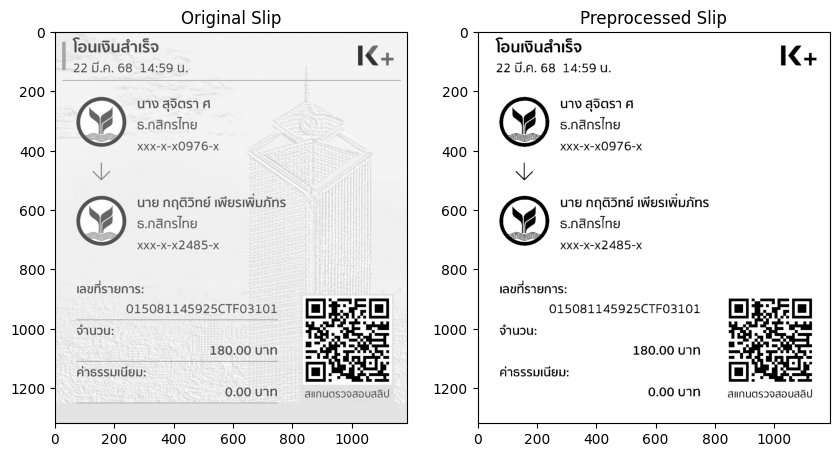

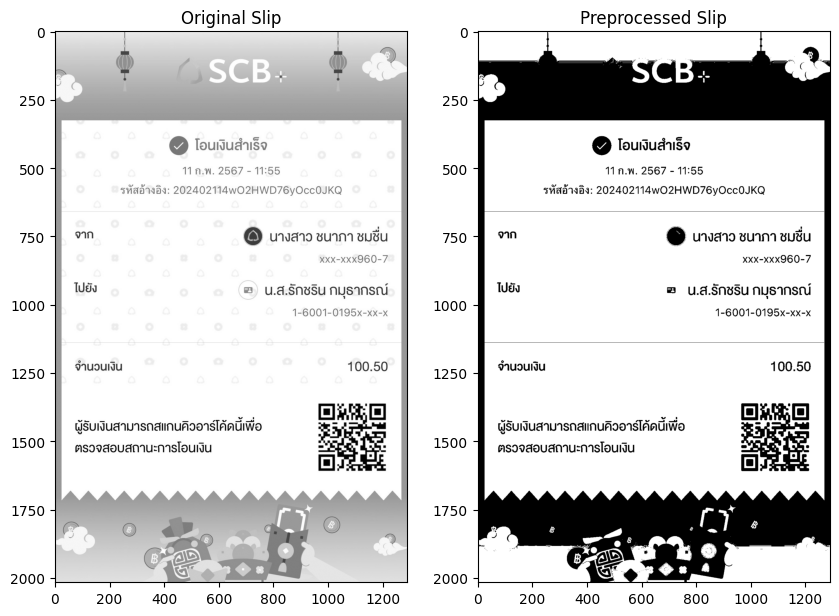

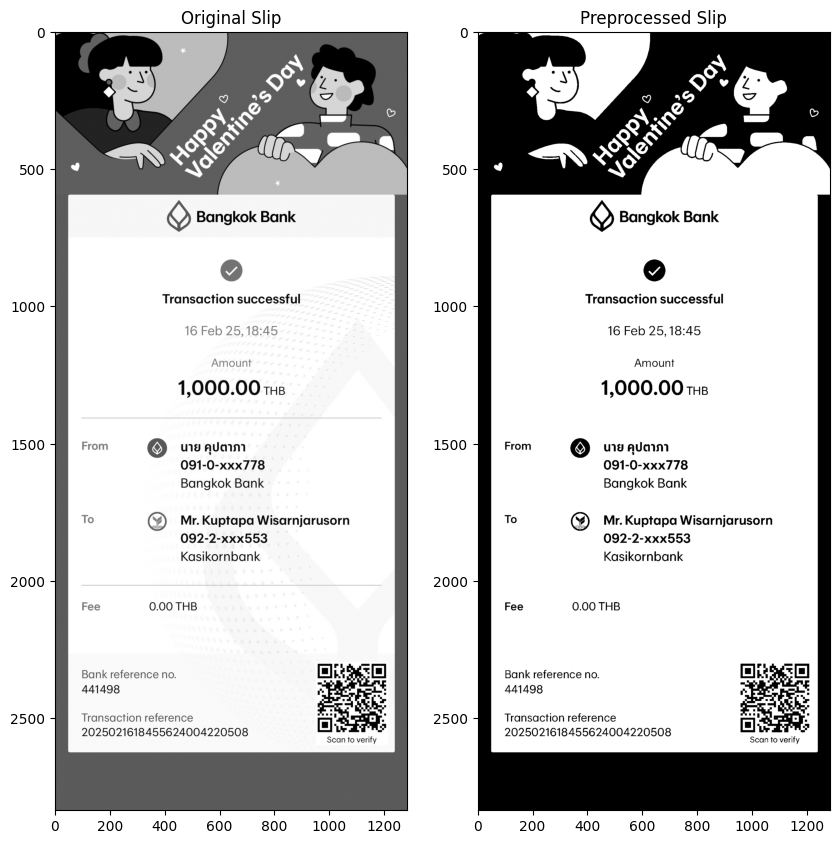

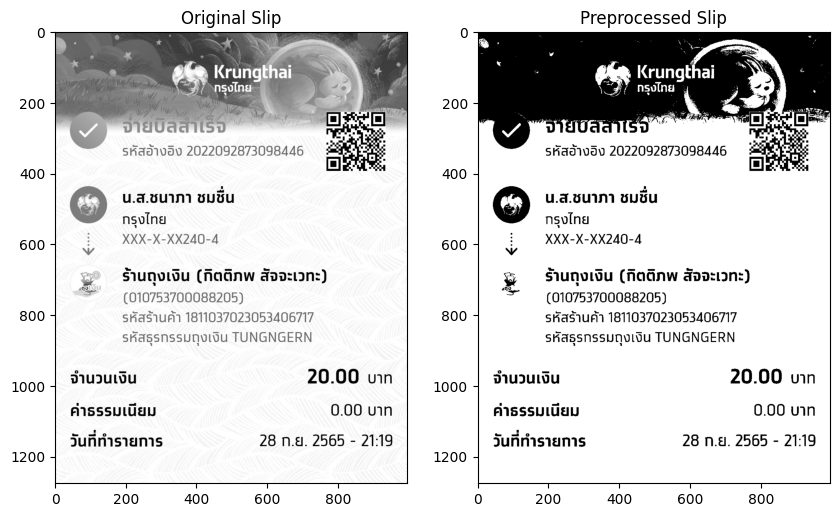

In [38]:
df = pd.read_csv(E_SLIP_DATA_CSV)

for test in test_set:
    img = test[0]
    preprocessed_slip = preprocess_bank_slip(img)

    plt.figure(figsize=(10, 15))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.imread(img, cv2.IMREAD_GRAYSCALE), cmap='gray')
    plt.title('Original Slip')

    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_slip, cmap='gray')
    plt.title('Preprocessed Slip')

plt.show()

## OCR

ชื่อธนาคาร, ชื่อผู้โอนเงิน, ชื่อผู้รับเงิน, จำนวนเงินโอน, วันเวลาที่ทำรายการ, เลขที่รายการ

### Py Tesseract OCR

@ โอนเงินสําเร็จ

24 เม.ย. 2567 - 16:25
รหัสอ้างอิง: 202404242y0JBeWgg9uU4jHDD

จาก                                   © งางสาว ชนาภาชมชื่น
XXX-XXX960-7

ไปยัง                       @ บจก. บางกอกโกลด์ 8
%-3500

จํานวนเงิน                                              3,500.00

wo.
a

ผู้รับเงินสามารถสแกนคิวอาะ์โค้ดนเพี
ตรวจสอบสถานะการโอนเงิน




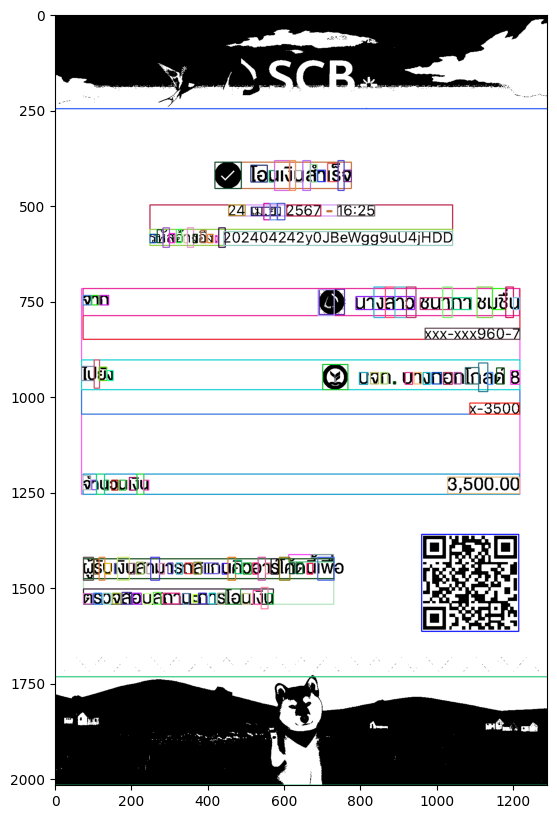

In [6]:
import pandas as pd
from function.e_slip.ocr_tesseract import ocr_pytesseract

df = pd.read_csv(E_SLIP_CLASSIFICATION_CSV)
text, box = ocr_pytesseract(cv2.imread(df['image_path'][120], cv2.IMREAD_GRAYSCALE))

print(text)
plt.figure(figsize=(15, 10))
plt.imshow(box, cmap='gray')

In [8]:
df = pd.read_csv(E_SLIP_CLASSIFICATION_CSV)
for index, row in df.iterrows():
    print(f'{index} - image: {row["image_path"]}')
    img = cv2.imread(row['image_path'], cv2.IMREAD_GRAYSCALE)
    text, box = ocr_pytesseract(img)
    df.loc[index, 'ocr'] = text

df.to_csv(E_SLIP_OCR_CSV, index=False)

0 - image: dataset\bangkok\e-slip\IMG_0051.JPG
1 - image: dataset\bangkok\e-slip\IMG_0052.JPG
2 - image: dataset\bangkok\e-slip\IMG_0053.JPG
3 - image: dataset\bangkok\e-slip\IMG_0054.JPG
4 - image: dataset\bangkok\e-slip\IMG_0055.JPG
5 - image: dataset\bangkok\e-slip\IMG_0056.JPG
6 - image: dataset\bangkok\e-slip\IMG_0057.JPG
7 - image: dataset\bangkok\e-slip\IMG_0058.PNG
8 - image: dataset\bangkok\e-slip\IMG_0059.PNG
9 - image: dataset\bangkok\e-slip\IMG_0060.PNG
10 - image: dataset\bangkok\e-slip\IMG_4463.JPG
11 - image: dataset\bangkok\e-slip\IMG_4490.JPG
12 - image: dataset\kbank\e-slip\47706706-2D17-45D6-9F5F-ECA0FB295EA9.jpeg
13 - image: dataset\kbank\e-slip\5E45E707-D23B-4E67-AA81-AF99CAF61B94.jpeg
14 - image: dataset\kbank\e-slip\8003D097-778E-46DB-849B-C23A7DED7C8E.jpeg
15 - image: dataset\kbank\e-slip\92AA11E2-E3F2-4ED9-AC62-1CFAACB5C059.jpeg
16 - image: dataset\kbank\e-slip\BC05E8B1-6CF2-48FB-A334-4DB200BF7068.jpeg
17 - image: dataset\kbank\e-slip\CBB98E9A-4E22-4B83-8E2E-C2

In [9]:
df

,bank,slip_type,image_path,predicted_bank,ocr
0,bangkok,e-slip,dataset\bangkok\e-slip\IMG_0051.JPG,bangkok,อ Bangkok Bank\n\nTransaction successful\n05 A...
1,bangkok,e-slip,dataset\bangkok\e-slip\IMG_0052.JPG,bangkok,อ Bangkok Bank\n\nTransaction successful\n05 A...
2,bangkok,e-slip,dataset\bangkok\e-slip\IMG_0053.JPG,bangkok,อ Bangkok Bank\n\nTransaction successful\n05 A...
3,bangkok,e-slip,dataset\bangkok\e-slip\IMG_0054.JPG,bangkok,อ Bangkok Bank\n\nTransaction successful\n05 A...
4,bangkok,e-slip,dataset\bangkok\e-slip\IMG_0055.JPG,bangkok,อ Bangkok Bank\n\nTransaction successful\n05 A...
...,...,...,...,...,...
124,scb,e-slip,dataset\scb\e-slip\IMG_4824.JPG,scb,@ วจ่ายบิลสําเร็จ\n\n08 พ.ค. 2567 - 18:45\nรหั...
125,scb,e-slip,dataset\scb\e-slip\IMG_4825.JPG,scb,@ โอนเงินสําเร็จ\n\n02 พ.ค. 2567 - 20:49\nรหัส...
126,scb,e-slip,dataset\scb\e-slip\IMG_4826.JPG,scb,@ วจ่ายเงินสําเร็จ\n\n03 พ.ค. 2567 - 12:37\nรห...
127,scb,e-slip,dataset\scb\e-slip\IMG_6935.JPG,scb,@ เติมเงินสําเร็จ\n\n15 ส.ค. 2567 - 08:04\nรหั...


### EasyOCR

In [20]:
import easyocr
reader = easyocr.Reader(['en','th'], gpu=False) # this needs to run only once to load the model into memory

Using CPU. Note: This module is much faster with a GPU.


In [ ]:
results = []

for test in test_set:
    img = preprocess_bank_slip(test[0])
    result = reader.readtext(img, detail=0)
    results.append((test[0], result))

    print(f'image: {test[0]}')
    print('--------------------------------')
    for i in result:
        print(i)
    print('--------------------------------')


image: dataset/kbank/e-slip/5E45E707-D23B-4E67-AA81-AF99CAF61B94.jpeg
--------------------------------
 krungthai
กรุงไทย
 จิายบิลสาิโรจ
 รหัสอ้างอิง 2022092873098446
น.ส.ชนาภา ชมชืน
กรุงไทย
 xxx x-xx240-4
ร้านถุงเงิน (กิตติภพ สัจจะเวทะ)
(010753700088205)
 รหัสร้านค้า 1811037023053406717
 รหัสธุรกรรมถุงเงิน tuncngern
จำนวนเงิน
20.00
บาท
ค่าธรรมเนียม
o.od บาท
วันที่ทำรายการ
28 ก.ย. 2565
21:19
--------------------------------
image: dataset/scb/e-slip/IMG_4822.JPG
--------------------------------
 krungthai
กรุงไทย
 จิายบิลสาิโรจ
 รหัสอ้างอิง 2022092873098446
น.ส.ชนาภา ชมชืน
กรุงไทย
 xxx x-xx240-4
ร้านถุงเงิน (กิตติภพ สัจจะเวทะ)
(010753700088205)
 รหัสร้านค้า 1811037023053406717
 รหัสธุรกรรมถุงเงิน tuncngern
จำนวนเงิน
20.00
บาท
ค่าธรรมเนียม
o.od บาท
วันที่ทำรายการ
28 ก.ย. 2565
21:19
--------------------------------
image: dataset/bangkok/e-slip/IMG_4463.JPG
--------------------------------
 krungthai
กรุงไทย
 จิายบิลสาิโรจ
 รหัสอ้างอิง 2022092873098446
น.ส.ชนาภา ชมชืน
กรุงไทย
 xxx x-xx24

## Extract data to table

In [12]:
import pandas as pd
from function.e_slip.extract_info import _extract_bangkok_info, _extract_krungthai_info, _extract_scb_info, _extract_kbank_info, get_thai_month_map

def extract_info(csv_path):
    df = pd.read_csv(csv_path)
    df_result = pd.DataFrame()

    try:
        thai_month_map = get_thai_month_map()
        for index, row in df.iterrows():
            print(f'{index} - bank: {row["predicted_bank"]} - image: {row["image_path"]}')
            bank = row['predicted_bank']
            ocr = row['ocr']
            if bank == 'bangkok':
                res = _extract_bangkok_info(ocr, thai_month_map)
            elif bank == 'krungthai':
                res = _extract_krungthai_info(ocr, thai_month_map)
            elif bank == 'scb':
                res = _extract_scb_info(ocr, thai_month_map)
            elif bank == 'kbank':
                res = _extract_kbank_info(ocr, thai_month_map)
            
            res['bank'] = bank
            res['image_path'] = row['image_path']
            res['ocr'] = ocr
            df_result = pd.concat([df_result, pd.DataFrame(res, index=[0])], ignore_index=True)
            
        df_result.to_csv(E_SLIP_RESULT_CSV, index=False)
        
    except FileNotFoundError:
        print("ocr.csv not found. Skipping processing of real CSV.")

extract_info(E_SLIP_OCR_CSV)
df_result = pd.read_csv(E_SLIP_RESULT_CSV)
df_result


0 - bank: bangkok - image: dataset\bangkok\e-slip\IMG_0051.JPG
1 - bank: bangkok - image: dataset\bangkok\e-slip\IMG_0052.JPG
2 - bank: bangkok - image: dataset\bangkok\e-slip\IMG_0053.JPG
3 - bank: bangkok - image: dataset\bangkok\e-slip\IMG_0054.JPG
4 - bank: bangkok - image: dataset\bangkok\e-slip\IMG_0055.JPG
5 - bank: bangkok - image: dataset\bangkok\e-slip\IMG_0056.JPG
6 - bank: bangkok - image: dataset\bangkok\e-slip\IMG_0057.JPG
7 - bank: bangkok - image: dataset\bangkok\e-slip\IMG_0058.PNG
8 - bank: bangkok - image: dataset\bangkok\e-slip\IMG_0059.PNG
9 - bank: bangkok - image: dataset\bangkok\e-slip\IMG_0060.PNG
10 - bank: bangkok - image: dataset\bangkok\e-slip\IMG_4463.JPG
11 - bank: bangkok - image: dataset\bangkok\e-slip\IMG_4490.JPG
12 - bank: kbank - image: dataset\kbank\e-slip\47706706-2D17-45D6-9F5F-ECA0FB295EA9.jpeg
13 - bank: kbank - image: dataset\kbank\e-slip\5E45E707-D23B-4E67-AA81-AF99CAF61B94.jpeg
14 - bank: kbank - image: dataset\kbank\e-slip\8003D097-778E-46D

C:\Users\kupta\AppData\Local\Temp\ipykernel_59856\261454039.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_result = pd.concat([df_result, pd.DataFrame(res, index=[0])], ignore_index=True)


,transaction_date,transaction_time,amount,from_account_name,to_account_name,to_bank,ref_number,bank,image_path,ocr
0,2025-04-05,13:03,99.0,น.ส.ร้อยแก้ว,LINE MAN,ttb,20250405130348033056656AD,bangkok,dataset\bangkok\e-slip\IMG_0051.JPG,อ Bangkok Bank\n\nTransaction successful\n05 A...
1,2025-04-05,14:08,15.0,น.ส.ร้อยแก้ว,MS. Roikaew Siriwat,NaN,590895,bangkok,dataset\bangkok\e-slip\IMG_0052.JPG,อ Bangkok Bank\n\nTransaction successful\n05 A...
2,2025-04-05,14:09,20.0,น.ส.ร้อยแก้ว,) MS. Roikaew Siriwat,NaN,594265,bangkok,dataset\bangkok\e-slip\IMG_0053.JPG,อ Bangkok Bank\n\nTransaction successful\n05 A...
3,2025-04-05,14:11,20.0,น.ส.ร้อยแก้ว,ROIKAEW SIRIW,NaN,2025040514111723009542008,bangkok,dataset\bangkok\e-slip\IMG_0054.JPG,อ Bangkok Bank\n\nTransaction successful\n05 A...
4,2025-04-05,14:12,10.0,น.ส.ร้อยแก้ว,MS. ROIKAEW SIRIWAT,NaN,2025040514122924001595908,bangkok,dataset\bangkok\e-slip\IMG_0055.JPG,อ Bangkok Bank\n\nTransaction successful\n05 A...
...,...,...,...,...,...,...,...,...,...,...
124,2024-05-08,18:45,1429.0,ง.ส.ชนาภาชเชื่น,K+ shop (BNN RESTAURANT-,NaN,202405083eddsxRmp6SzRb4B2,scb,dataset\scb\e-slip\IMG_4824.JPG,@ วจ่ายบิลสําเร็จ\n\n08 พ.ค. 2567 - 18:45\nรหั...
125,2024-05-02,20:49,10.0,งางสาว ชนาภาชมชื่น,ปี นายวรเชษฐ์ จําธูญศิธี,NaN,202405020e2yk1bF7LYzy3MOt,scb,dataset\scb\e-slip\IMG_4825.JPG,@ โอนเงินสําเร็จ\n\n02 พ.ค. 2567 - 20:49\nรหัส...
126,2024-05-03,12:37,55.0,ส.ชนาภาชเชื่น,น.ส. บัวจิน จอมแบ่ง,PromptPay,2024050341,scb,dataset\scb\e-slip\IMG_4826.JPG,@ วจ่ายเงินสําเร็จ\n\n03 พ.ค. 2567 - 12:37\nรห...
127,2024-08-15,08:04,100.0,เส. ร้อยแก้ว ศิริวัฒน์,NaN,NaN,202408151gcrSyPX3umYtpuH1,scb,dataset\scb\e-slip\IMG_6935.JPG,@ เติมเงินสําเร็จ\n\n15 ส.ค. 2567 - 08:04\nรหั...


In [13]:
df[df['from_bank'] == 'bangkok'].head(20)

,transaction_date,transaction_time,amount,from_account_name,from_bank,to_account_name,to_bank,ref_number
0,2025-04-05,13:03,99.0,น.ส.ร้อยแก้ว,bangkok,LINE MAN,ttb,20250405130348033056656AD\n\nS
1,2025-04-05,14:08,15.0,น.ส.ร้อยแก้ว,bangkok,MS. Roikaew Siriwat,PromptPay,NaN
2,2025-04-05,14:09,20.0,น.ส.ร้อยแก้ว,bangkok,) MS. Roikaew Siriwat,Kasikornbank,NaN
3,2025-04-05,14:11,20.0,น.ส.ร้อยแก้ว,bangkok,ROIKAEW SIRIW,Siam Commercial Bank,2025040514111723009542008\n\nS
4,2025-04-05,14:12,10.0,น.ส.ร้อยแก้ว,bangkok,MS. ROIKAEW SIRIWAT,Kiatnakin Phatra Bank,2025040514122924001595908\n\nS
5,2025-04-05,14:13,12.5,น.ส.ร้อยแก้ว,bangkok,ROIKAEW SIRIWAT,Kiatnakin Phatra Bank,2025040514134124009954308\n\nS
6,2025-04-05,14:16,3.0,น.ส.ร้อยแก้ว,bangkok,ROIKAEW SIRIWAT,Kiatnakin Phatra Bank,2025040514160724006996808\n\nS
7,2025-04-05,14:16,3.0,NaN,bangkok,NaN,NaN,2025040514160724006996808\n\nC
8,2025-04-05,14:13,12.5,NaN,bangkok,NaN,NaN,2025040514134124009954308\n\nC
9,2025-04-05,14:12,NaN,NaN,bangkok,NaN,NaN,2025040514122924001595908\n\nC


In [9]:
df[df['from_bank'] == 'kbank'].tail(20)

,transaction_date,transaction_time,amount,from_account_name,from_bank,to_account_name,to_bank,ref_number
50,NaN,NaN,45.0,นาย คุปตาภาว,kbank,NaN,NaN,01508012320160800938
51,NaN,NaN,40.0,นาย คุปตาภา ว,kbank,NaN,NaN,015081075705BOR03813
52,NaN,NaN,50.0,นาย คุปตาภาว,kbank,NaN,NaN,015082110034BPM13636
53,NaN,NaN,1500.0,นาย คุปตาภา ว,kbank,NaN,NaN,015083035110ATFO7232
54,NaN,NaN,30.0,นาย คุปตาภา ว,kbank,NaN,NaN,015084120304BTF02854
55,NaN,NaN,50.0,นาย คุปตาภา ว,kbank,NaN,NaN,015084165150APP05030
56,NaN,NaN,55.0,นาย คุปตาภาว,kbank,NaN,NaN,015085182100BPP02271
57,NaN,NaN,50.0,นาย คุปตาภาว,kbank,NaN,NaN,015086213418APP03339
58,NaN,NaN,55.0,นาย คุปตาภาว,kbank,NaN,NaN,015091113538APM04971
59,2024-08-06,20:38,127.0,น.ส. ร้อยแก้ว ศ,kbank,NaN,NaN,014219203857APP04398


In [14]:
df[df['from_bank'] == 'scb'].tail(20)

,transaction_date,transaction_time,amount,from_account_name,from_bank,to_account_name,to_bank,ref_number
109,NaN,NaN,254.0,เส. ร้อยแก้ว ศิริวัฒน์,scb,NaN,NaN,202504044WAmotE67cVKQlxia
110,NaN,NaN,200.0,Gas PLANET ธ8,scb,งางสาว ร้อยแก้ว ศิริวัฒน์,NaN,202504043
111,NaN,NaN,200.0,งางสาว ร้อยแก้ว ศิริวัฒน์,scb,NaN,NaN,202504040PywkBFZIY2bIC1IbV
112,NaN,NaN,200.0,งางสาว ชนาภา ชมชื่น,scb,NaN,NaN,202401274x4
113,2024-01-30,11:24,476.7,ง.ส.ชนาภาชเชื่น,scb,K+ shop (311 WATSONS SALAYA MAR),NaN,202401302ivGEnNgQ9RZLOflq
114,2024-01-31,17:08,1500.0,งางสาว ชนาภาชมชื่น,scb,ง.ส.ชนาภาชพชื่น,NaN,202401312
115,NaN,NaN,357.0,เง.ส.ชนาภาชมชื่น,scb,K+ shop (FUJI-CENTRAL SALAYA),NaN,202402184CHiuPUOmErMO69q8
116,NaN,NaN,890.0,งางสาว ชนาภาชมชื่น,scb,ง.ส.ชนาภาชพชื่น,NaN,20240222190DWTpXn8T3XXR6a
117,NaN,NaN,200.0,งางสาว ชนาภา ชมชื่น,scb,NaN,NaN,202403181JCGIbJp2Lvwx19Jd
118,NaN,NaN,1088.0,ส.ชนาภาชเชื่น,scb,K+ shop (MK RESTAURANT GROUP),NaN,2024041331PIYCAIVNKQIRLVA


In [18]:
df[df['from_bank'] == 'krungthai'].head(20)

,transaction_date,transaction_time,amount,from_account_name,from_bank,to_account_name,to_bank,ref_number
70,NaN,NaN,20.00,usunshwdi et* * *,krungthai,น.ุส. ชรีนทร์ทิพย์ ศิรวัฒน์,NaN,Ab14539fe68ae42f5
71,NaN,NaN,20.00,usunshwdi et* * *,krungthai,น.ุส. ชรีนทร์ทิพย์ ศิรวัฒน์,NaN,Ab14539fe68ae42f5
72,NaN,NaN,300.00,น.ส.ชนาภา ชมชิน,krungthai,NaN,NaN,NaN
73,2022-05-05,01:29,550.00,น.ส.ชนาภา ชมชื้น,krungthai,นาย คุปตาภา วิสารจารุศร,NaN,2022050587805714
74,NaN,NaN,1000.00,น.ส.ชนาภา ชมชื้น,krungthai,NaN,NaN,NaN
75,NaN,NaN,200.00,น.ส.ชนาภา ชมชื้น,krungthai,NaN,NaN,NaN
76,NaN,NaN,75.00,น.ส.ชนาภา ชมชื้น,krungthai,NaN,NaN,NaN
77,NaN,NaN,100.00,น.ส.ชนาภา ชมชื้น,krungthai,NaN,NaN,2022072570728520
78,NaN,NaN,1800.00,น.ส.ชนาภา ชมชื้น,krungthai,NaN,NaN,NaN
79,NaN,NaN,150.00,iG,krungthai,NaN,NaN,1521400331020220901


## Evaluation Results

In [14]:
import pandas as pd
import numpy as np
import os

def simple_evaluation(csv_path):
    """Simple evaluation showing missing data counts for each column by bank."""
    
    print("="*80)
    print("📊 SIMPLE E-SLIP EXTRACTION EVALUATION")
    print("="*80)
    
    # Create evaluation folder if it doesn't exist
    os.makedirs('evaluation', exist_ok=True)
    
    # Load data
    try:
        df = pd.read_csv(csv_path)
        print(f"✅ Loaded {len(df)} records from {csv_path}")
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return
    
    # Columns to analyze (excluding OCR and image_path)
    columns_to_analyze = [
        'transaction_date', 
        'transaction_time', 
        'amount', 
        'from_account_name', 
        'to_account_name', 
        'to_bank', 
        'ref_number'
    ]
    
    banks = sorted(df['bank'].unique())
    
    print(f"\n📈 TOTAL RECORDS BY BANK:")
    print("-" * 30)
    for bank in banks:
        count = len(df[df['bank'] == bank])
        print(f"{bank.upper()}: {count} records")
    
    print(f"\n🔍 MISSING DATA COUNT BY BANK AND COLUMN:")
    print("=" * 80)
    
    # Prepare data for CSV export
    detailed_results = []
    summary_table_data = []
    
    # Create summary for each bank
    for bank in banks:
        bank_data = df[df['bank'] == bank]
        total_records = len(bank_data)
        
        print(f"\n🏛️ {bank.upper()} BANK ({total_records} records)")
        print("-" * 50)
        
        summary_row = {
            'bank': bank.upper(),
            'total_records': total_records
        }
        
        for column in columns_to_analyze:
            # Count missing (null or empty)
            null_count = bank_data[column].isnull().sum()
            empty_count = (bank_data[column] == '').sum() if bank_data[column].dtype == 'object' else 0
            total_missing = null_count + empty_count
            
            # Calculate success rate
            success_count = total_records - total_missing
            success_rate = (success_count / total_records) * 100
            
            # Status emoji
            if success_rate >= 95:
                status = "✅"
            elif success_rate >= 80:
                status = "⚠️"
            else:
                status = "❌"
            
            print(f"{status} {column}: {total_missing}/{total_records} missing ({success_rate:.1f}% success)")
            
            # Add to detailed results
            detailed_results.append({
                'bank': bank.upper(),
                'column': column,
                'total_records': total_records,
                'null_count': null_count,
                'empty_count': empty_count,
                'total_missing': total_missing,
                'success_count': success_count,
                'success_rate': round(success_rate, 1),
                'status': 'Excellent' if success_rate >= 95 else 'Good' if success_rate >= 80 else 'Poor'
            })
            
            # Add to summary table
            summary_row[f'{column}_missing'] = total_missing
            summary_row[f'{column}_success_rate'] = round(success_rate, 1)
        
        summary_table_data.append(summary_row)
    
    # Overall summary table
    print(f"\n📊 SUMMARY TABLE - MISSING COUNT BY BANK:")
    print("=" * 80)
    
    # Create summary DataFrame for display
    summary_data = []
    for bank in banks:
        bank_data = df[df['bank'] == bank]
        total_records = len(bank_data)
        row = [bank.upper(), total_records]
        
        for column in columns_to_analyze:
            null_count = bank_data[column].isnull().sum()
            empty_count = (bank_data[column] == '').sum() if bank_data[column].dtype == 'object' else 0
            total_missing = null_count + empty_count
            row.append(total_missing)
        
        summary_data.append(row)
    
    # Print table header
    header = ["BANK", "TOTAL"] + [col.replace('_', '_').upper()[:12] for col in columns_to_analyze]
    print(" | ".join(f"{h:>12}" for h in header))
    print("-" * (13 * len(header) + len(header) - 1))
    
    # Print table rows
    for row in summary_data:
        formatted_row = [f"{str(item):>12}" for item in row]
        print(" | ".join(formatted_row))
    
    # Overall statistics
    print(f"\n📈 OVERALL STATISTICS:")
    print("=" * 40)
    
    overall_stats = []
    for column in columns_to_analyze:
        null_count = df[column].isnull().sum()
        empty_count = (df[column] == '').sum() if df[column].dtype == 'object' else 0
        total_missing = null_count + empty_count
        success_rate = ((len(df) - total_missing) / len(df)) * 100
        
        status = "✅" if success_rate >= 95 else "⚠️" if success_rate >= 80 else "❌"
        print(f"{status} {column}: {total_missing}/{len(df)} missing ({success_rate:.1f}% success)")
        
        overall_stats.append({
            'column': column,
            'total_records': len(df),
            'total_missing': total_missing,
            'success_rate': round(success_rate, 1),
            'status': 'Excellent' if success_rate >= 95 else 'Good' if success_rate >= 80 else 'Poor'
        })
    
    # Best and worst performing fields
    field_performance = {}
    for column in columns_to_analyze:
        null_count = df[column].isnull().sum()
        empty_count = (df[column] == '').sum() if df[column].dtype == 'object' else 0
        total_missing = null_count + empty_count
        success_rate = ((len(df) - total_missing) / len(df)) * 100
        field_performance[column] = success_rate
    
    sorted_fields = sorted(field_performance.items(), key=lambda x: x[1], reverse=True)
    
    print(f"\n🏆 FIELD PERFORMANCE RANKING:")
    print("-" * 40)
    field_ranking = []
    for i, (field, rate) in enumerate(sorted_fields, 1):
        emoji = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "📊"
        print(f"{emoji} #{i} {field}: {rate:.1f}% success")
        field_ranking.append({
            'rank': i,
            'field': field,
            'success_rate': round(rate, 1)
        })
    
    # Bank performance ranking
    bank_performance = {}
    for bank in banks:
        bank_data = df[df['bank'] == bank]
        total_records = len(bank_data)
        total_fields = len(columns_to_analyze) * total_records
        
        missing_count = 0
        for column in columns_to_analyze:
            null_count = bank_data[column].isnull().sum()
            empty_count = (bank_data[column] == '').sum() if bank_data[column].dtype == 'object' else 0
            missing_count += null_count + empty_count
        
        success_rate = ((total_fields - missing_count) / total_fields) * 100
        bank_performance[bank] = success_rate
    
    sorted_banks = sorted(bank_performance.items(), key=lambda x: x[1], reverse=True)
    
    print(f"\n🏆 BANK PERFORMANCE RANKING:")
    print("-" * 40)
    bank_ranking = []
    for i, (bank, rate) in enumerate(sorted_banks, 1):
        emoji = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "🏛️"
        print(f"{emoji} #{i} {bank.upper()}: {rate:.1f}% overall success")
        bank_ranking.append({
            'rank': i,
            'bank': bank.upper(),
            'overall_success_rate': round(rate, 1)
        })
    
    # Save detailed results to CSV files
    print(f"\n💾 SAVING DETAILED RESULTS TO CSV FILES:")
    print("=" * 50)
    
    # 1. Detailed results by bank and column
    detailed_df = pd.DataFrame(detailed_results)
    detailed_file = 'evaluation/detailed_missing_data_by_bank_column.csv'
    detailed_df.to_csv(detailed_file, index=False)
    print(f"✅ Detailed results saved to: {detailed_file}")
    
    # 2. Summary table by bank
    summary_df = pd.DataFrame(summary_table_data)
    summary_file = 'evaluation/summary_missing_data_by_bank.csv'
    summary_df.to_csv(summary_file, index=False)
    print(f"✅ Summary by bank saved to: {summary_file}")
    
    # 3. Overall statistics
    overall_df = pd.DataFrame(overall_stats)
    overall_file = 'evaluation/overall_statistics.csv'
    overall_df.to_csv(overall_file, index=False)
    print(f"✅ Overall statistics saved to: {overall_file}")
    
    # 4. Field performance ranking
    field_df = pd.DataFrame(field_ranking)
    field_file = 'evaluation/field_performance_ranking.csv'
    field_df.to_csv(field_file, index=False)
    print(f"✅ Field ranking saved to: {field_file}")
    
    # 5. Bank performance ranking
    bank_df = pd.DataFrame(bank_ranking)
    bank_file = 'evaluation/bank_performance_ranking.csv'
    bank_df.to_csv(bank_file, index=False)
    print(f"✅ Bank ranking saved to: {bank_file}")
    
    # 6. Create a comprehensive summary CSV
    comprehensive_data = []
    for bank in banks:
        bank_data = df[df['bank'] == bank]
        total_records = len(bank_data)
        
        # Calculate overall bank performance
        total_fields = len(columns_to_analyze) * total_records
        missing_count = 0
        for column in columns_to_analyze:
            null_count = bank_data[column].isnull().sum()
            empty_count = (bank_data[column] == '').sum() if bank_data[column].dtype == 'object' else 0
            missing_count += null_count + empty_count
        overall_success = ((total_fields - missing_count) / total_fields) * 100
        
        comprehensive_data.append({
            'bank': bank.upper(),
            'total_records': total_records,
            'overall_success_rate': round(overall_success, 1),
            'transaction_date_missing': sum(1 for _, row in bank_data.iterrows() if pd.isna(row['transaction_date']) or row['transaction_date'] == ''),
            'transaction_time_missing': sum(1 for _, row in bank_data.iterrows() if pd.isna(row['transaction_time']) or row['transaction_time'] == ''),
            'amount_missing': sum(1 for _, row in bank_data.iterrows() if pd.isna(row['amount']) or row['amount'] == ''),
            'from_account_name_missing': sum(1 for _, row in bank_data.iterrows() if pd.isna(row['from_account_name']) or row['from_account_name'] == ''),
            'to_account_name_missing': sum(1 for _, row in bank_data.iterrows() if pd.isna(row['to_account_name']) or row['to_account_name'] == ''),
            'to_bank_missing': sum(1 for _, row in bank_data.iterrows() if pd.isna(row['to_bank']) or row['to_bank'] == ''),
            'ref_number_missing': sum(1 for _, row in bank_data.iterrows() if pd.isna(row['ref_number']) or row['ref_number'] == '')
        })
    
    comprehensive_df = pd.DataFrame(comprehensive_data)
    comprehensive_file = 'evaluation/comprehensive_evaluation_summary.csv'
    comprehensive_df.to_csv(comprehensive_file, index=False)
    print(f"✅ Comprehensive summary saved to: {comprehensive_file}")
    
    # Save simple summary text file
    with open('evaluation/simple_evaluation_summary.txt', 'w', encoding='utf-8') as f:
        f.write("SIMPLE E-SLIP EXTRACTION EVALUATION\n")
        f.write("="*50 + "\n\n")
        
        f.write("MISSING DATA COUNT BY BANK:\n\n")
        for bank in banks:
            bank_data = df[df['bank'] == bank]
            total_records = len(bank_data)
            f.write(f"{bank.upper()} BANK ({total_records} records):\n")
            
            for column in columns_to_analyze:
                null_count = bank_data[column].isnull().sum()
                empty_count = (bank_data[column] == '').sum() if bank_data[column].dtype == 'object' else 0
                total_missing = null_count + empty_count
                success_rate = ((total_records - total_missing) / total_records) * 100
                f.write(f"  {column}: {total_missing}/{total_records} missing ({success_rate:.1f}% success)\n")
            f.write("\n")
        
        f.write("FIELD PERFORMANCE RANKING:\n")
        for i, (field, rate) in enumerate(sorted_fields, 1):
            f.write(f"  #{i} {field}: {rate:.1f}% success\n")
        
        f.write("\nBANK PERFORMANCE RANKING:\n")
        for i, (bank, rate) in enumerate(sorted_banks, 1):
            f.write(f"  #{i} {bank.upper()}: {rate:.1f}% overall success\n")
    
    print(f"✅ Text summary saved to: evaluation/simple_evaluation_summary.txt")
    
    print(f"\n📁 All evaluation files saved in the 'evaluation' folder!")
    
    return {
        'detailed_results': detailed_df,
        'summary_by_bank': summary_df,
        'overall_stats': overall_df,
        'field_ranking': field_df,
        'bank_ranking': bank_df,
        'comprehensive_summary': comprehensive_df
    }


results = simple_evaluation(E_SLIP_RESULT_CSV) 

📊 SIMPLE E-SLIP EXTRACTION EVALUATION
✅ Loaded 129 records from results_csv/eslip_result.csv

📈 TOTAL RECORDS BY BANK:
------------------------------
BANGKOK: 12 records
KBANK: 58 records
KRUNGTHAI: 18 records
SCB: 41 records

🔍 MISSING DATA COUNT BY BANK AND COLUMN:

🏛️ BANGKOK BANK (12 records)
--------------------------------------------------
✅ transaction_date: 0/12 missing (100.0% success)
✅ transaction_time: 0/12 missing (100.0% success)
✅ amount: 0/12 missing (100.0% success)
❌ from_account_name: 3/12 missing (75.0% success)
❌ to_account_name: 3/12 missing (75.0% success)
❌ to_bank: 11/12 missing (8.3% success)
✅ ref_number: 0/12 missing (100.0% success)

🏛️ KBANK BANK (58 records)
--------------------------------------------------
❌ transaction_date: 50/58 missing (13.8% success)
❌ transaction_time: 50/58 missing (13.8% success)
⚠️ amount: 7/58 missing (87.9% success)
✅ from_account_name: 0/58 missing (100.0% success)
✅ to_account_name: 0/58 missing (100.0% success)
❌ to_bank:

In [18]:
pd.read_csv(r'evaluation\overall_statistics.csv')

,column,total_records,total_missing,success_rate,status
0,transaction_date,129,96,25.6,Poor
1,transaction_time,129,96,25.6,Poor
2,amount,129,9,93.0,Good
3,from_account_name,129,6,95.3,Excellent
4,to_account_name,129,22,82.9,Good
5,to_bank,129,108,16.3,Poor
6,ref_number,129,18,86.0,Good


In [20]:
pd.read_csv(r'evaluation\comprehensive_evaluation_summary.csv')


,bank,total_records,overall_success_rate,transaction_date_missing,transaction_time_missing,amount_missing,from_account_name_missing,to_account_name_missing,to_bank_missing,ref_number_missing
0,BANGKOK,12,79.8,0,0,0,3,3,11,0
1,KBANK,58,60.6,50,50,7,0,0,50,3
2,KRUNGTHAI,18,50.0,13,13,1,1,8,12,15
3,SCB,41,59.9,33,33,1,2,11,35,0


In [22]:
pd.read_csv(r'evaluation\summary_missing_data_by_bank.csv')

,bank,total_records,transaction_date_missing,transaction_date_success_rate,transaction_time_missing,transaction_time_success_rate,amount_missing,amount_success_rate,from_account_name_missing,from_account_name_success_rate,to_account_name_missing,to_account_name_success_rate,to_bank_missing,to_bank_success_rate,ref_number_missing,ref_number_success_rate
0,BANGKOK,12,0,100.0,0,100.0,0,100.0,3,75.0,3,75.0,11,8.3,0,100.0
1,KBANK,58,50,13.8,50,13.8,7,87.9,0,100.0,0,100.0,50,13.8,3,94.8
2,KRUNGTHAI,18,13,27.8,13,27.8,1,94.4,1,94.4,8,55.6,12,33.3,15,16.7
3,SCB,41,33,19.5,33,19.5,1,97.6,2,95.1,11,73.2,35,14.6,0,100.0
